In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wines = pd.read_csv('winequality.csv', sep=';')

In [3]:
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [5]:
wines.describe(include='object')


,type,alcohol
count,6497,6497
unique,2,112
top,White,9.5
freq,4898,367


In [6]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [7]:
wines.type.unique()

array(['White', 'Red'], dtype=object)

In [8]:
wines.alcohol.value_counts().sort_index()

10                     229
10.1                   161
10.15                    3
10.2                   176
10.3                   118
10.4                   194
10.5                   227
10.55                    4
10.6                   142
10.65                    1
10.7                   123
10.75                    1
10.8                   177
10.9                   137
10.98                    1
100.333.333.333.333      3
101.333.333.333.333      2
104.666.666.666.667      2
105.333.333.333.333      1
105.666.666.666.667      1
109.333.333.333.333      2
109.666.666.666.667      3
11                     217
11.05                    2
11.1                   110
11.2                   148
11.3                   133
11.35                    1
11.4                   153
11.45                    4
                      ... 
14.2                     1
14.9                     1
8                        1
8.0                      1
8.4                      5
8.5                     10
8

In [9]:
import re
pattern = r'([0-9]{3}\.){4}[0-9]{3}'

wines['alcohol'] = wines['alcohol'].replace(pattern, np.nan, regex=True)

In [10]:
wines.alcohol.value_counts().sort_index()

10       229
10.1     161
10.15      3
10.2     176
10.3     118
10.4     194
10.5     227
10.55      4
10.6     142
10.65      1
10.7     123
10.75      1
10.8     177
10.9     137
10.98      1
11       217
11.05      2
11.1     110
11.2     148
11.3     133
11.35      1
11.4     153
11.45      4
11.5     118
11.55      1
11.6      61
11.65      1
11.7      81
11.75      2
11.8      89
        ... 
13.7       7
13.8       2
13.9       3
14        12
14.05      1
14.2       1
14.9       1
8          1
8.0        1
8.4        5
8.5       10
8.6       23
8.7       80
8.8      109
8.9       95
9        215
9.05       1
9.1      167
9.2      271
9.25       1
9.3      193
9.4      332
9.5      367
9.55       4
9.6      187
9.7      159
9.75       1
9.8      214
9.9      158
9.95       1
Name: alcohol, Length: 87, dtype: int64

In [11]:
wines['alcohol'] = wines['alcohol'].astype('float64')

In [12]:
wines_clean = wines.dropna(axis=0, how='any')

In [13]:
wines_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null object
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 706.2+ KB


In [14]:
wines_clean.shape

(6457, 13)

In [15]:
wines_clean.loc[:,'type'] = wines_clean['type'].astype('category')

/home/daniel/envs/datascience/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
wines_clean['type'].value_counts()

White    4864
Red      1593
Name: type, dtype: int64

In [37]:
wines_dum = pd.get_dummies(wines_clean, prefix_sep='_')

In [39]:
wines_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
type_Red                6457 non-null uint8
type_White              6457 non-null uint8
dtypes: float64(11), int64(1), uint8(2)
memory usage: 668.4 KB


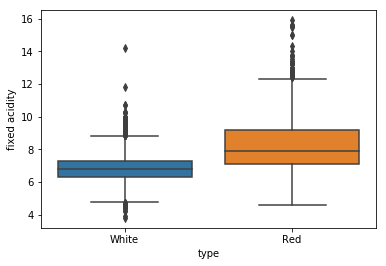

In [18]:
sns.boxplot(x='type', y='fixed acidity', data=wines)

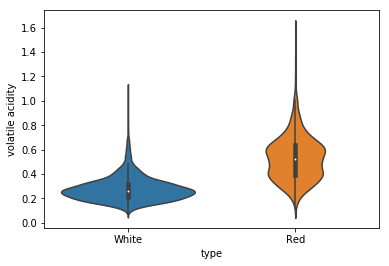

In [19]:
sns.violinplot(x='type', y='volatile acidity', data=wines)

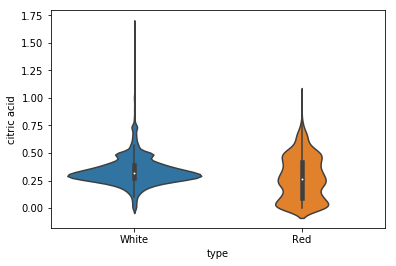

In [20]:
sns.violinplot(x='type', y='citric acid', data=wines)

In [40]:
wines_labels = wines_dum['quality']
wines_processed = wines_dum.drop('quality', axis=1)

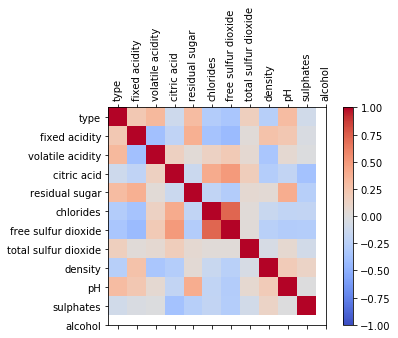

In [22]:
wines_corr = wines_processed.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(wines_corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(wines_processed.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(wines_processed.columns)
ax.set_yticklabels(wines_processed.columns)
plt.show()

In [23]:
wines_corr[wines_corr >= 0.7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.720979,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720979,1.000000,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dbcf56828>,
      dtype=object)

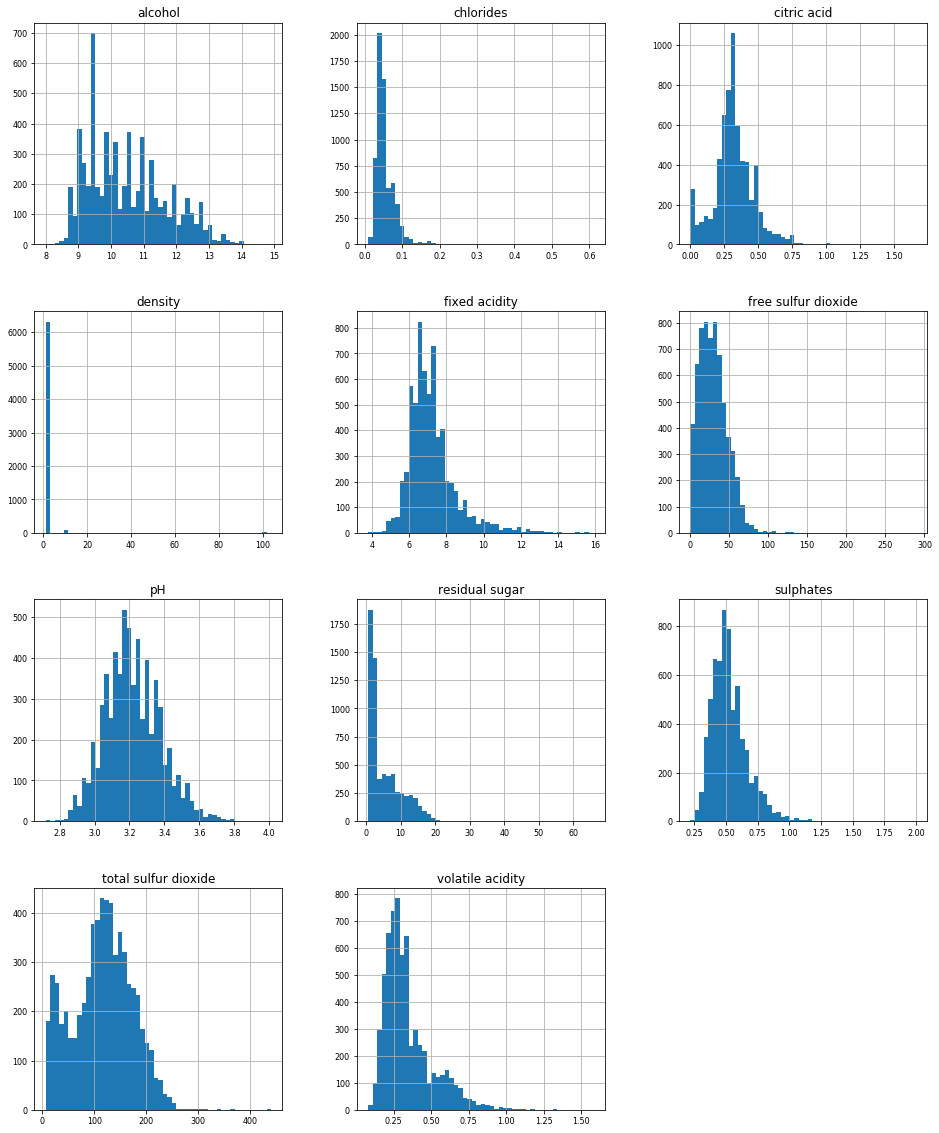

In [24]:
wines_num = wines_processed.select_dtypes(include = ['float64', 'int64'])
wines_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Considering that the variables *free sulfur dioxide* and *total sulfur dioxide* have a high correlation (greater than 0.7), I decided to keep the first one on the data. 

In [25]:
wines_processed = wines_processed.drop('total sulfur dioxide', axis=1)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [27]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [41]:
X_train, X_holdout, y_train, y_holdout = train_test_split(wines_processed, wines_labels, train_size=0.7)

/home/daniel/envs/datascience/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [42]:
X_test, X_val, y_test, y_val = train_test_split(X_holdout, y_holdout, train_size=0.5)

/home/daniel/envs/datascience/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
y_predicted = knn.predict(X_test)

In [49]:
from sklearn.metrics import log_loss

In [50]:
log_loss(y_train, y_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [969, 4519]

Coisas a fazer:

Reamostrar os dados, considerando que temos mais vinho tinto do que vinho branco
separar os dados em 70/15/15 para começar os treinamentos

Verificar uma boa métrica. Creio que o erro quadrático médio é eficiente

